# Type Annotations

#### **1. Dictionary**
- Normal Python Dictionary:

In [7]:
movie = {"name":"Angry Birds",
         "year":2009,
         "genre":"Action",
         "rating":7.5
        }
print(movie)
print(type(movie))

{'name': 'Angry Birds', 'year': 2009, 'genre': 'Action', 'rating': 7.5}
<class 'dict'>


* Properities:
  1. Allows for efficient data retrieval based on unique keys
  2. Flexible and easy to implement
  3. **Leads to challenges in ensuring that the data is a particular structure espicially for large projects**
  4. Doesn't check if the data is the correct type or structure

HOW TO SOLVE THIS ?!!

To Solve the Problem of the normal dictionary, we can use:
* **Typed Dictionary**
  - This type annotation is used extensively in LangGraph, which will be used to states when creating Agents

In [6]:
from typing import TypedDict

class Movie(TypedDict):
    title: str
    year: int
    genre: str
    rating: float

# Create an instance of the Movie class
movie = Movie(title="The Shawshank Redemption", year=1994, genre="Drama", rating=9.3)

print(type(movie))

<class 'dict'>


* Properities:
  * Typed Safety: We defined explicitly what the data strucutres are, reducing runtime errors.
  * Type Inference: We don't need to specify the types of the variables, the compiler can infer them.
  * Type Checking: We can check the types of the variables at compile time, reducing 
  * Enhanced Readability: Makes debugging easier and makes the code more structured and understandable.

### **2. Union**

In [11]:
from typing import Union

def square(x: Union[int, float]) -> Union[int, float]:
    return x ** 2

x = 5  # this works fine as x is an int
print(square(x))
x = 1.25  # this works fine as x is a float
print(square(x))
x = "Hello"  # this will raise an error as x is a string
# print(square(x))
x = True  # this works fine as x is a bool
print(square(x))

25
1.5625
1


* Properities:
  * Union lets you say that a value can be more than one type
  * Flexible and easy to use and code
  * Typed Safety: as it can provide hints to help catch incorrect usage

### **3. Optional:**

In [12]:
from typing import Optional

def message(name: Optional[str]) -> None:
    if name is None:
        print("Hey, Random Person!")
    else:
        print(f"Hey, {name}!")

message("Joe")
message(None)

Hey, Joe!
Hey, Random Person!


In [17]:
from typing import Optional


# Example 1: Function with Optional parameter
def greet(name: Optional[str] = None) -> str:
    if name is None:
        return "Hello, Guest!"
    return f"Hello, {name}!"


# Example 2: Class with Optional attributes
class User:
    def __init__(self, username: str, email: Optional[str] = None):
        self.username = username
        self.email = email


# Usage examples:
print(greet())  # Outputs: "Hello, Guest!"
print(greet("Alice"))  # Outputs: "Hello, Alice!"

user1 = User("john_doe")  # email is None
print(user1.username, user1.email)  # Outputs: "john_doe"
user2 = User("jane_doe", "jane@example.com")  # email is provided

print(user2.username, user2.email)  # Outputs: "jane_doe"

Hello, Guest!
Hello, Alice!
john_doe None
jane_doe jane@example.com


* Properties:
  * It quite similar as Union 
  * Optional is a special type hint that indicates a value can be either of a specified type or None. 
  * It's actually syntactic sugar for Union[Type, None]. It quite similar as Union
  * it cannot be anything else except None or a type mentioned


### **4. Any**

In [ ]:
from typing import Any

def print_value(x: Any):
    print(x)


# This function accepts a value of 'Any' type but checks the type before operations
def process_anything(item: Any) -> None:
    print(f"Item is: {item}")

    # Check if item is a sequence (list) before trying to modify it
    if isinstance(item, list):
        item[0] = "new value"

    # Check if item is a number before arithmetic
    if isinstance(item, (int, float)):
        result = item + 10
        print(f"Added 10 to get: {result}")

    print("Processing complete.")


# Test with different types
print_value(14)
process_anything([1, 2, 3])  # Works with list
process_anything(15)  # Works with number

14
Item is: [1, 2, 3]
Processing complete.
Item is: 15
Added 10 to get: 25
Processing complete.


In [33]:
from typing import Any


def process_object(item: object) -> None:
    print(f"Item is: {item}")
    # item.do_a_dance() # This would be a type error! 'object' has no 'do_a_dance' method.

    # To use it safely, you must check its type.
    if isinstance(item, list):
        print(item[0])  # OK, type checker knows it's a list inside this block.


def process_any(item: Any) -> None:
    print(f"Item is: {item}")

# --- Calling the functions ---
process_object([1, 2, 3])  # This is fine.
process_object(5) # This is also fine, but you can't do much with it inside.

process_any(10)  # This is fine for the type checker, but will fail at runtime.

Item is: [1, 2, 3]
1
Item is: 5
Item is: 10


# Lambda function:

In [1]:
square = lambda x: x ** 2
print(square(5))

numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
squares = list(map(lambda x: x ** 2, numbers))
print(squares)

25
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


# Elements:

## State:
* The state is a shared data structure that holds the current information or context of the entire application.
* In simple terms. it is like the application's memory, keeping track of the variables and data nodes can access and modify as they execute.

> Analogy:
  * Imagine there is a whiteboard on the meeting room, and the Participants (nodes) write and read information on the whiteboard (state) to stay updated and coordinate actions.
  

## Nodes:
* Nodes are individual functions or operations that perform specific tasks within the graph.
* Each node receives input (often the current state), processes it, and produces an output or an updated state.

## Graph:
* A Graph in LangGraph si the overarching structure that maps out how different tasks (nodes) are connected and executed.
* It visually represents the workflow, showing the sequence and conditional paths between various operations.
> Analogy:
  * Road map: a road map displaying the different routes connecting cities, with intersections offering choices on which path to take next.

**HOW THESE POINTS ARE CONNECTED ??!** 
- Look for the next element "Edges"

## Edges:
* Edges are the connections between nodes that determine the flow of execution.
* They tell us which node should be executed next after the current one completes its task.

> Analogy:
  * Train Track: Each track (edge) connects the stations (nodes) together in a specific direction.

## Conditional Edges:
*  Conditional Edges are specialized connections that decide the next node to execute based on specific conditions or logic applied to the current state.
  
> Analogy:
   * Traffic Light

## Start:
* The Start node is a virtual entry point in LangGraph, marking where the workflow begins.
* It doesn't perform any operations itself but serves as the designated starting position for the graph's execution.

> Analogy:
  * Race Start Line: The place where a race officially starts

## End:
* The End node signifies the conclusion of the workflow in LangGraph.
* Upon reaching this node, the graph's execution stops, indicating that all intended processes have been completed.

## Tools:

* Tools are specialized functions or utilities that nodes can utilize to perform specific tasks such as fetching data from an API.
* They enhanced the capabilities of the nodes by providing addional functionalities.
* Nodes are part of the graph structure, while tools are functionalities used within nodes.

> Analogy:
* Tools in Toolbox

**Question...**
Is there a middle man between a tool and node ?
> Yes, that why ToolNode comes in !.

## ToolNode:
* A ToolNode is just a special kind of node whose main is to run a tool.
* It connects the tool's output back into the **State**, so other nodes can use that information.

> Analogy:
* Operator who is using machine: The operator (ToolNode) controls the machine (tool), then takes the results back to the assembly line

## StateGraph:
* A StateGraph is a class in LangGraph used to build and compile the graph structure.
* It manages the nodes, edges, and overall state, ensuring that the workflow operates in a unified way and that data flows correctly between components.

> Analogy:
  * Blueprint of building: Just as a blueprint outlines the design and connections within a building, a StateGraph defines the structre and flow of the workflow.

## Runnable:
*  A Runnable in LangGraph is a standardized executable component that performs a specific task within an AI Workflow.
* It serves as a fundamental building block, allowing for us to create modular systems.

## Messages:
  * 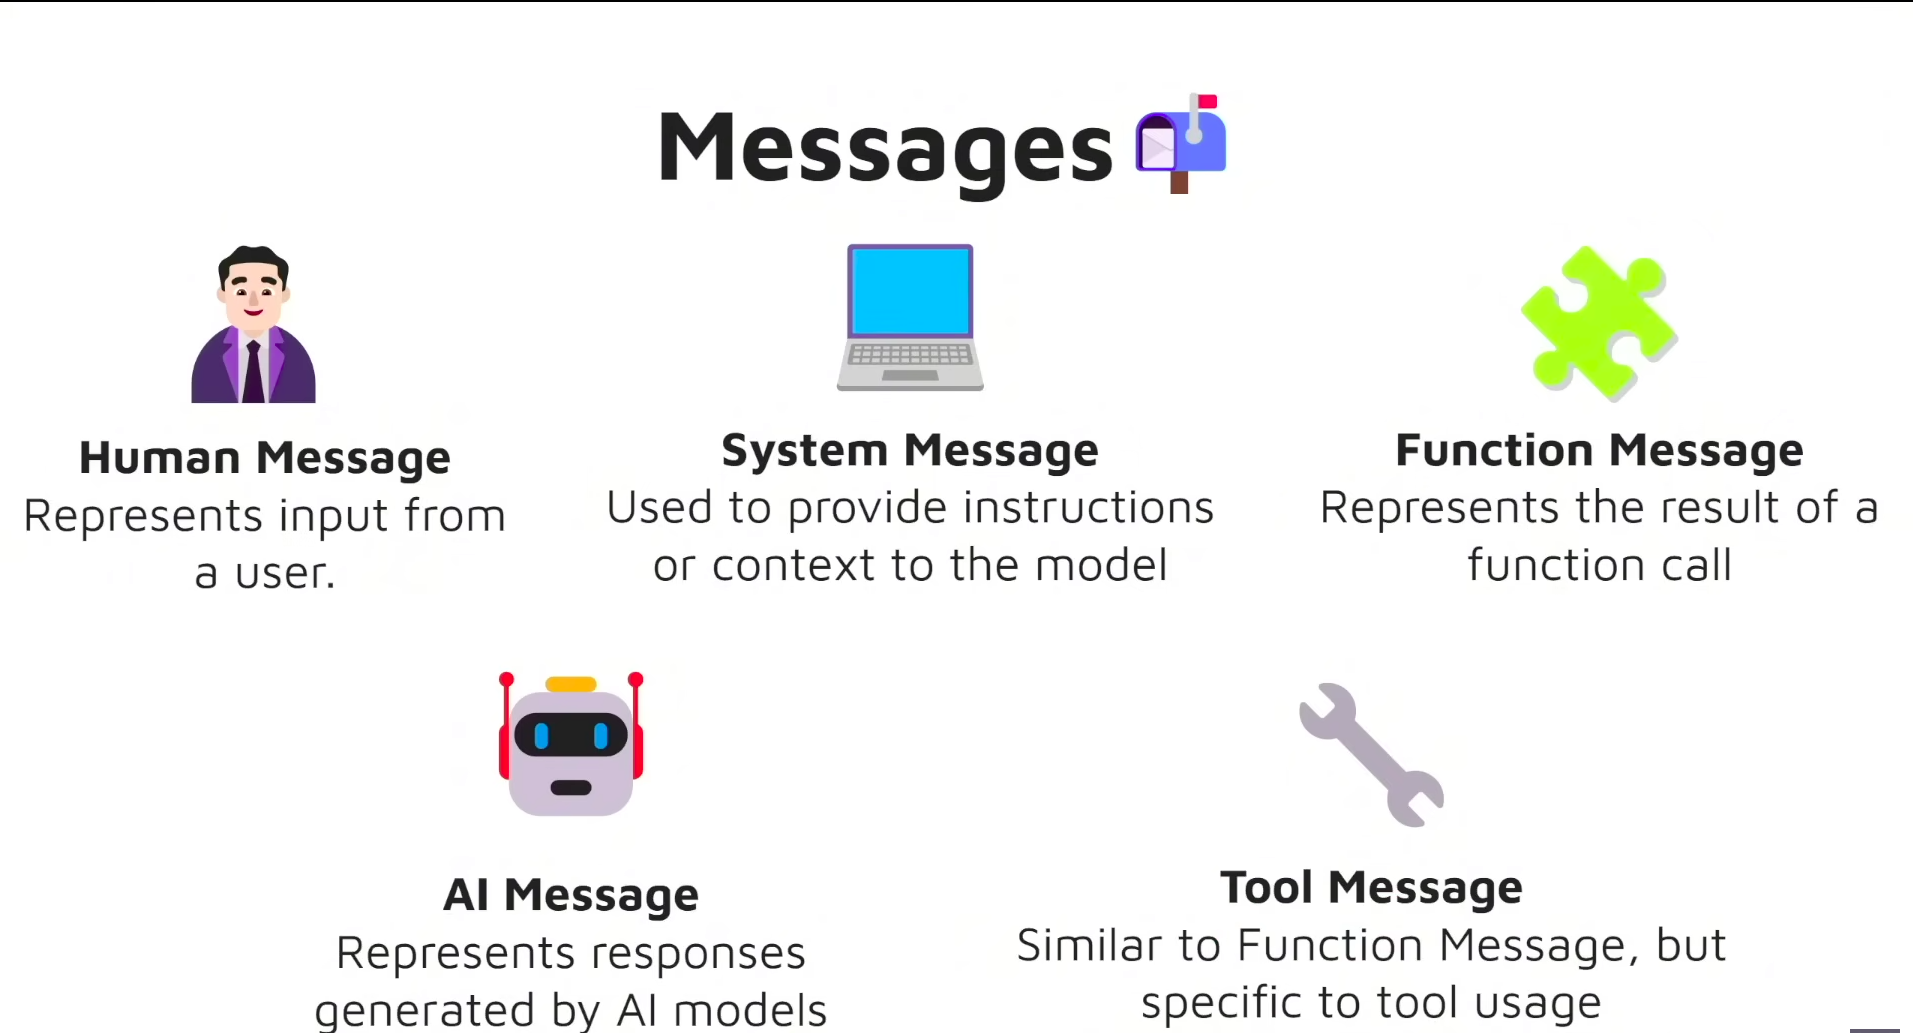

## Coding Time:

### Graph 1:
#### Hello World Graph

* **Objectives:**
  * 1. Understand and define the AgentState structure.
  * 2. Create simple node functions to process and update state.
  * 3. Set up a basic LangGraph structure.
  * 4. Compile and invoke a LangGraph Graph
  * 5. Understand how data flows through a single-node in LangGraph.

In [46]:
from typing import TypedDict, Any, Optional
from langgraph.graph import StateGraph


class AgentState(TypedDict):  # Our state schema
    message: str
    

def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""
    
    state['message'] = "Hello, "  + state['message'] + ", How is your day going on?"
    
    return state

In [47]:
graph = StateGraph(AgentState)
graph.add_node("Greeter", greeting_node)
graph.set_entry_point("Greeter")
graph.set_finish_point("Greeter")

app = graph.compile()


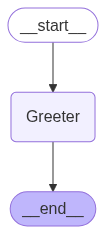

In [48]:
from IPython.display import Image, display
png_bytes = app.get_graph().draw_mermaid_png()
display(Image(png_bytes))

In [49]:
# Optional: save to file
with open("langgraph_flow.png", "wb") as f:
    f.write(png_bytes)

In [50]:
result = app.invoke({"message":"Joe"})

In [51]:
result["message"]

'Hello, Joe, How is your day going on?'

### Graph 2:

In [52]:
from typing import TypedDict
from langgraph.graph import StateGraph


# --- Define the state schema ---
class AgentState(TypedDict):
    name: str
    compliment: str


# --- Define the node function ---
def compliment_node(state: AgentState) -> AgentState:
    # Concatenate instead of replacing
    state["compliment"] = (state["name"] + ", you're doing an amazing job learning LangGraph!")
    
    return state


# --- Build the graph ---
graph = StateGraph(AgentState)
graph.add_node("Complimenter", compliment_node)

graph.set_entry_point("Complimenter")
graph.set_finish_point("Complimenter")

app = graph.compile()



In [53]:
# --- Run the graph ---
initial_state: AgentState = {"name": "Bob", "compliment": ""}
final_state = app.invoke(initial_state)  # app() works too depending on version

print(final_state["compliment"])

Bob, you're doing an amazing job learning LangGraph!


### Graph 3:

In [43]:
from typing import TypedDict, Any, Optional, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    values: List[int]
    name: Optional[str]
    result: str

In [16]:
def process_node(state:AgentState)-> AgentState:
    """This function handles multiple different inputs"""
    
    state["result"] = f"Hi, {state['name']}!. Your sum is {sum(state['values'])}"
    
    return state

In [17]:
graph = StateGraph(AgentState)

graph.add_node("Processor", process_node)
graph.set_entry_point("Processor")
graph.set_finish_point("Processor")

app = graph.compile()


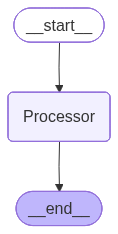

In [18]:
from IPython.display import Image, display

png_bytes = (
    app.get_graph().draw_mermaid_png()
)  # call the method (important: include ())
display(Image(png_bytes))

In [19]:
answers = app.invoke({"name":"Jack Sparrow", "values":[2,4,6,8]})

In [20]:
answers["result"]

'Hi, Jack Sparrow!. Your sum is 20'

In [21]:
class AgentState(TypedDict):
    values: List[int]
    name: Optional[str]
    operation: str
    result: str

In [22]:
import math
from functools import reduce
from operator import sub, truediv

def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    values = state.get('values', [])
    
    if state['operation'] == "+":
        state["result"] = f"Hi, {state['name']}!. Your sum is {sum(state['values'])}"
    elif state["operation"] == "-":
        state["result"] = f"Hi, {state['name']}!. Your Subtraction is {reduce(sub, state['values'])}"
    elif state["operation"] == "*":
        state["result"] = f"Hi, {state['name']}!. Your multiplication is {math.prod(state['values'])}"
    elif state["operation"] == "/":
        try:
            # Check if any number after the first one is zero.
            if any(v == 0 for v in values):
                raise ZeroDivisionError
            result = reduce(truediv, values)
            state["result"] = f"Hi, {state['name']}!. Your division result is {result}."
        except ZeroDivisionError:
            state["result"] = f"Hi, {state['name']}!. Error: Division by zero is not allowed."
    else:
        state["result"] = f"Hi, {state['name']}!. No valid task for today!"
    return state

In [6]:
graph = StateGraph(AgentState)

graph.add_node("Processor", process_values)
graph.set_entry_point("Processor")
graph.set_finish_point("Processor")

app = graph.compile()

In [14]:
answer = app.invoke({"name": "Jack Sparrow", "values": [2, 4, 6, 8], "operation": "+"})

In [12]:
answer["result"]

'Hi, Jack Sparrow!. Your sum is 20'

### Sequential Agent:

In [1]:
from typing import TypedDict, Optional, Any
from langgraph.graph import StateGraph


class AgentState(TypedDict):
    name: Optional[str]
    age: Optional[int]
    final: str

In [14]:
def first_node(state: AgentState) -> AgentState:
    """This is the first node of our sequential graph"""
    
    state['final'] = "Hi, "+ state['name'] + ". How are you?. "
    
    return state

In [15]:
def second_node(state: AgentState) -> AgentState:
    """This is the second node of our sequential graph"""
    
    state['final'] = state['final'] + f"\nYou are {state['age']} years old!"
    
    return state

In [16]:
graph = StateGraph(AgentState)

graph.add_node("first_node",first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node","second_node")
graph.set_finish_point("second_node")

app = graph.compile()

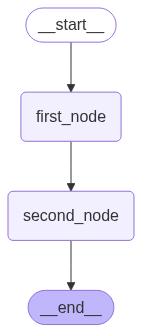

In [17]:
from IPython.display import Image, display

png_bytes = (
    app.get_graph().draw_mermaid_png()
)  # call the method (important: include ())
display(Image(png_bytes))

In [18]:
result = app.invoke({"name":"Dave", "age":25})

In [20]:
result["final"]

'Hi, Dave. How are you?. \nYou are 25 years old!'

#### Exercise:

In [44]:
class AgentState(TypedDict):
    name: str
    age: Optional[int]
    skills: List[str]
    final_result: str

In [36]:
def first_node(state: AgentState) -> AgentState:
    """This node will greet the user"""

    state["final_result"] = f"{state["name"]} welcome to the system!"
    return state


def second_node(state: AgentState) -> AgentState:
    """This node will describe the user's age"""

    state["final_result"] = (
        state["final_result"] + f" You are {state["age"]} years old!"
    )
    return state

def third_node(state: AgentState) -> AgentState:
    """This node to list the user skills"""
    state["final_result"] = state["final_result"] + f" You have skills in: {", ".join(state['skills'])}"
    
    return state

In [37]:
graph = StateGraph(AgentState)

graph.add_node("personalize", first_node)
graph.add_node("age_description", second_node)
graph.add_node("skills_description", third_node)

graph.set_entry_point("personalize")
graph.add_edge("personalize", "age_description")
graph.add_edge("age_description", "skills_description")
graph.set_finish_point("skills_description")

app = graph.compile()

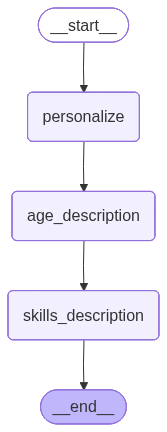

In [38]:
from IPython.display import Image, display

png_bytes = (
    app.get_graph().draw_mermaid_png()
)  # call the method (important: include ())
display(Image(png_bytes))

In [ ]:
result = app.invoke(
    {"name": "Linda", "age": 27, "skills": ["Python", "Machine Learning", "LangGraph"]}  # type: ignore
)

result

{'name': 'Linda',
 'age': 27,
 'skills': ['Python', 'Machine Learning', 'LangGraph'],
 'final_result': 'Linda welcome to the system! You are 27 years old! You have skills in: Python, Machine Learning, LangGraph'}

In [41]:
result["final_result"]

'Linda welcome to the system! You are 27 years old! You have skills in: Python, Machine Learning, LangGraph'

### Conditional Node:
* Implement conditional logic to route the flow of data to different nodes
* Use START and END nodes to manage entry and exit points explicitly.
* Design multiple nodes to perform different operations (addition, subtraction).
* Create a router node to handle decision-making and control graph flow.

> Main Goal: How to use "add_conditional_edges()"

In [2]:
from typing import TypedDict, Optional
from langgraph.graph import StateGraph, START, END


class AgentState(TypedDict):
    number_1: Optional[int]
    operator: Optional[str]
    number_2: Optional[int]
    final_number: Optional[int]

In [ ]:
def adder_node(state: AgentState) -> AgentState:
    """This node adds two numbers"""

    state["final_number"] = state["number_1"] + state["number_2"] # type: ignore
    return state


def subtractor_node(state: AgentState) -> AgentState:
    """This node subtracts two numbers"""

    state["final_number"] = state["number_1"] - state["number_2"]  # type: ignore
    return state


# def decide_next_node(state: AgentState) -> AgentState: # router node
#     """This node will select the next node of the graph"""

#     if state["operator"] == "+":
#         return "addition_operator"

#     elif state["operator"] == "-":
#         return "subtraction_operator"


def decide_next_node(state: AgentState) -> str:
    if state["operator"] == "+":
        return "addition_operation"
    elif state["operator"] == "-":
        return "subtraction_operation"
    else:
        raise ValueError("Unsupported operator")

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("addition_node", adder_node)
graph.add_node("subtraction_node", subtractor_node)
# graph.add_node("router", decide_next_node)  

# Because: Contract of add_node
# Every node in a LangGraph must be a function that takes the state and returns the state (a TypedDict in your case).
# That way, the graph engine always knows how the workflow data flows.

graph.add_node("router", lambda state:state)
graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "addition_operation": "addition_node",
        "subtraction_operation": "subtraction_node",
    },
)

graph.add_edge("addition_node", END)
graph.add_edge("subtraction_node", END)

app = graph.compile()


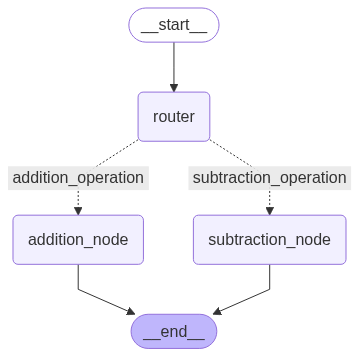

In [39]:
from IPython.display import Image, display

png_bytes = (
    app.get_graph().draw_mermaid_png()
)  # call the method (important: include ())
display(Image(png_bytes))

In [ ]:
initial_state = AgentState(number_1=10, operator="-", number_2=5)  # type: ignore
print(app.invoke(initial_state))

{'number_1': 10, 'operator': '-', 'number_2': 5, 'final_number': 5}


In [41]:
# This way still works!

result = app.invoke({"number_1": 10, "operator": "+", "number_2": 5}) # type: ignore
print(result)

{'number_1': 10, 'operator': '+', 'number_2': 5, 'final_number': 15}


#### Exercise:

In [1]:
from typing import TypedDict, List, Optional
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number_1: Optional[int]
    number_2: Optional[int]
    number_3: Optional[int]
    number_4: Optional[int]
    operator_1: Optional[str]
    operator_2: Optional[str]
    output_1: Optional[int]
    output_2: Optional[int]

In [3]:
def adder_node_1(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    print("adder")
    state["output_1"] = state["number_1"] + state["number_2"] # type: ignore
    
    return state

def subtractor_node_1(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    print("subtractor")
    state["output_1"] = state["number_1"] - state["number_2"] # type: ignore
    
    return state

def router_node_1(state: AgentState)-> str:
    """This node will select the next phase"""
    if state["operator_1"] == "+":
        return "addition_operation_1"

    elif state["operator_1"] == "-":
        return "subtraction_operation_1"

#######################################################################

def adder_node_2(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    print("adder")
    state["output_2"] = state["number_3"] + state["number_4"]  # type: ignore

    return state


def subtractor_node_2(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    print("subtractor")
    state["output_2"] = state["number_3"] - state["number_4"]  # type: ignore

    return state


def router_node_2(state: AgentState) -> str:
    """This node will select the next phase"""
    if state["operator_2"] == "+":
        return "addition_operation_2"

    elif state["operator_2"] == "-":
        return "subtraction_operation_2"

In [4]:
graph = StateGraph(AgentState)

graph.add_node("addition_node_1", adder_node_1)
graph.add_node("subtraction_node_1", subtractor_node_1)
# graph.add_node("router", decide_next_node)

# Because: Contract of add_node
# Every node in a LangGraph must be a function that takes the state and returns the state (a TypedDict in your case).
# That way, the graph engine always knows how the workflow data flows.

graph.add_node("router_node_1", lambda state: state)


graph.add_node("addition_node_2", adder_node_2)
graph.add_node("subtraction_node_2", subtractor_node_2)
graph.add_node("router_node_2", lambda state: state)


graph.add_edge(START, "router_node_1")

graph.add_conditional_edges(
    "router_node_1",
    router_node_1,
    {
        # Edge: Node
        "addition_operation_1": "addition_node_1",
        "subtraction_operation_1": "subtraction_node_1",
    },
)

graph.add_edge("addition_node_1", "router_node_2")
graph.add_edge("subtraction_node_1", "router_node_2")

graph.add_conditional_edges(
    "router_node_2",
    router_node_2,
    {
        # Edge: Node
        "addition_operation_2": "addition_node_2",
        "subtraction_operation_2": "subtraction_node_2",
    },
)

graph.add_edge("addition_node_2", END)
graph.add_edge("subtraction_node_2", END)

app = graph.compile()

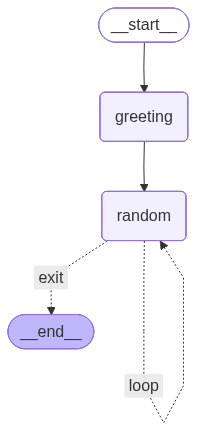

In [18]:
from IPython.display import Image, display

png_bytes = (
    app.get_graph().draw_mermaid_png()
)  # call the method (important: include ())
display(Image(png_bytes))

In [11]:
initial_state = AgentState(
    number_1=10,
    operator_1="-",
    number_2=5,
    number_3=7,
    number_4=2,
    operator_2="+"
)

In [12]:
result = app.invoke(initial_state)
print(result["output_1"])
print(result["output_2"])

subtractor
adder
5
9


### Graph 4
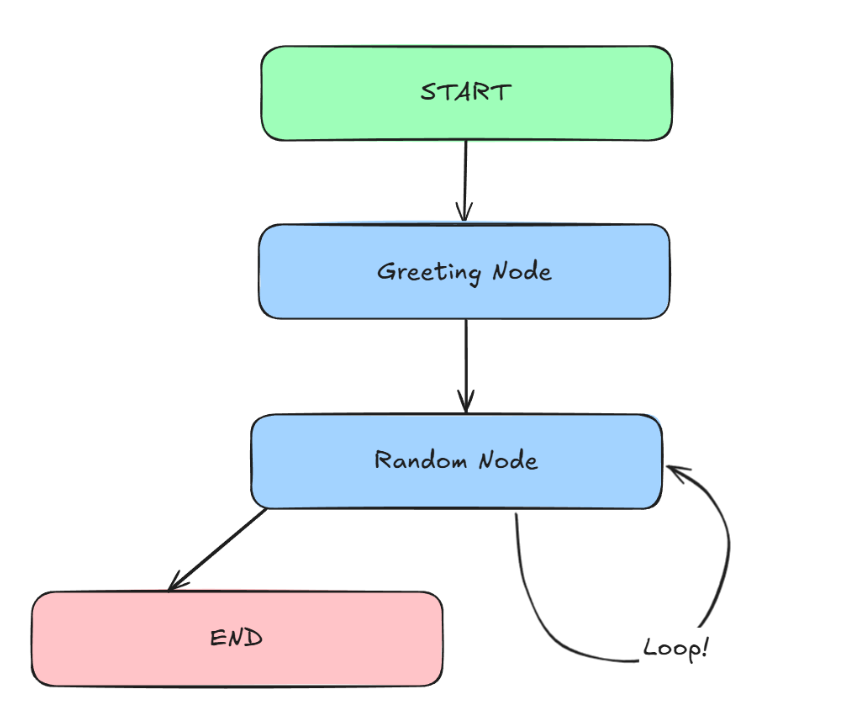

#### Looping

In [13]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict, Optional

In [14]:
class AgentState(TypedDict):
    name: Optional[str]
    number: List[int]
    counter: int

In [15]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hi there, {state["name"]}"
    state["counter"] = 0

    return state


def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state


def should_continue(state: AgentState) -> str:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"  # Continue looping
    else:
        return "exit"  # Exit the loop

> greeting → random → random → random → random → random → END

In [16]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")


graph.add_conditional_edges(
    "random", should_continue, {"loop": "random", "exit": END}  # Source node  # Action
)

graph.set_entry_point("greeting")

app = graph.compile()

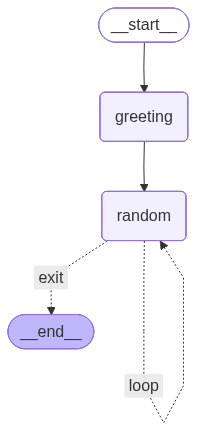

In [17]:
from IPython.display import Image, display

png_bytes = (
    app.get_graph().draw_mermaid_png()
)  # call the method (important: include ())
display(Image(png_bytes))

In [26]:
result = app.invoke({"name":"Mohammed","number":[], "counter": 4})
result

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Mohammed', 'number': [6, 2, 0, 1, 9], 'counter': 5}

#### Exercise:
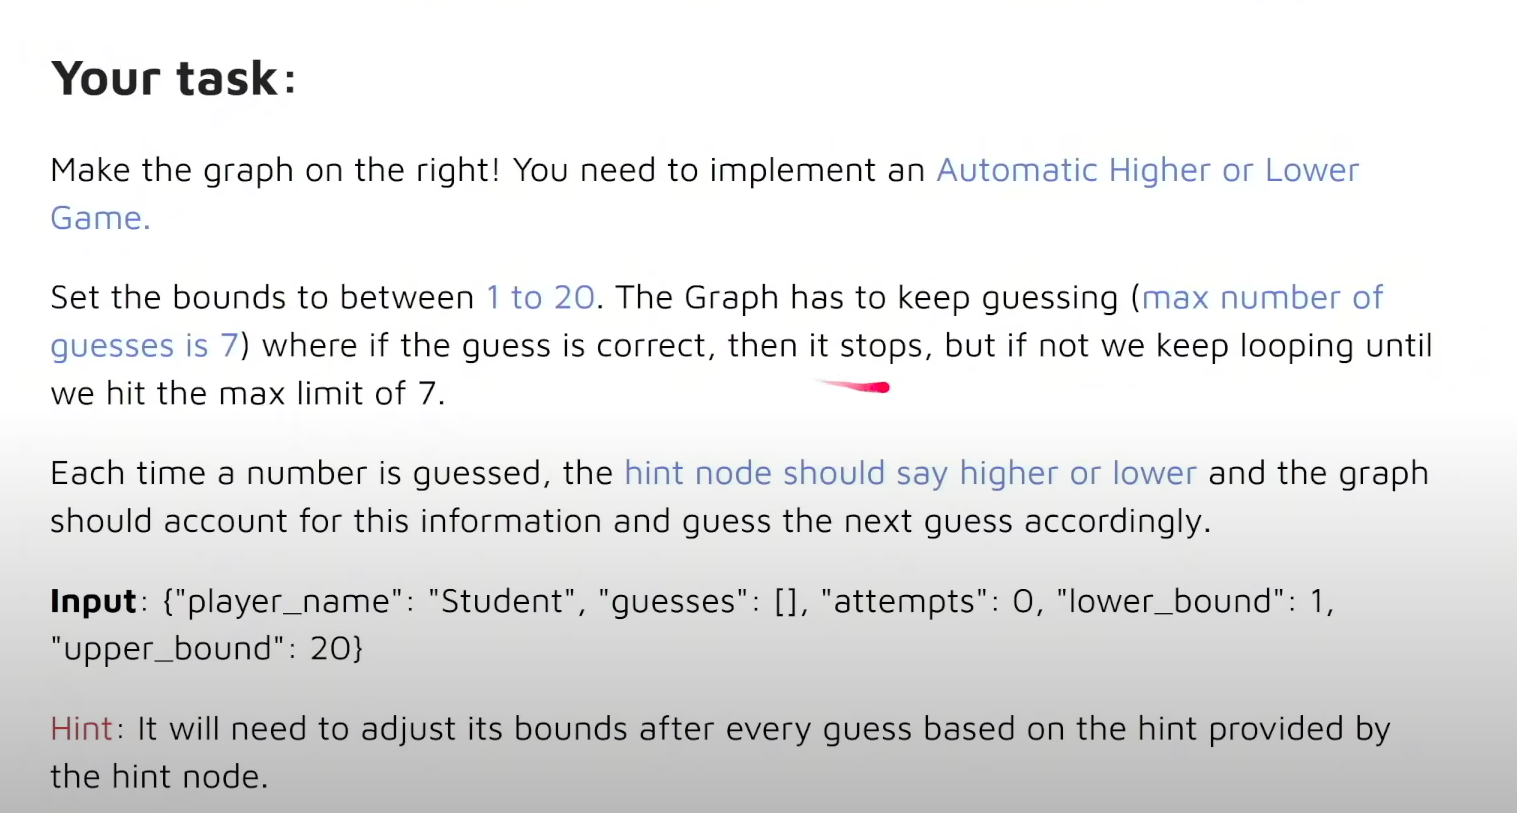

In [48]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [49]:
MAX_ATTEMPTS = 7

class GameState(TypedDict):
    player_name: Optional[str]
    target_number: Optional[int]
    guesses: List[int]
    attempts: Optional[int]
    hint: Optional[str]
    lower_bound: Optional[int]
    upper_bound: Optional[int]
    start_msg: Optional[str]

In [ ]:
def setup_node(state: GameState) ->GameState:
    state['player_name'] = "Welcome, " + state['player_name'] + "!"
    state['target_number'] = random.randint(1,20)
    state['guesses'] = []
    state['attempts'] = 0
    state['hint'] = "Guess the number"
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    print(f"{state['player_name']}, I'm thinking of a number between 1 to 20")
    return state

In [63]:
def guess_node(state: GameState) -> GameState:
    if state["attempts"] >= MAX_ATTEMPTS:
        state["hint"] = (
            f"Max attempts reached! The number was {state['target_number']}."
        )
        return state

    # Binary search strategy
    guess = (state["lower_bound"] + state["upper_bound"]) // 2
    state["guesses"].append(guess)
    state["attempts"] += 1

    if guess == state["target_number"]:
        state["hint"] = f"Correct! The number was {guess}. Guessed in {state['attempts']} attempts."
        print(state['hint'])
        print("GAME OVER: Number found!")

    elif guess < state["target_number"]:
        state["hint"] = f"Hint: The number {guess} is too low. Try higher!"
        print(state["hint"])
        state["lower_bound"] = guess + 1
        print(f"CONTINUING: {state['attempts']}/{MAX_ATTEMPTS} attempts used")
    else:
        state["hint"] = f"Hint: The number {guess} is too high. Try lower!"
        print(state["hint"])
        state["upper_bound"] = guess - 1
        print(f"CONTINUING: {state['attempts']}/{MAX_ATTEMPTS} attempts used")

    return state

In [64]:
def continue_node(state: GameState) -> GameState:
    # Decide whether to continue guessing or end
    if "Success!" in state["hint"] or state["attempts"] >= MAX_ATTEMPTS:
        return END
    return "guess"

In [65]:
graph = StateGraph(GameState)

graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)

graph.set_entry_point("setup")
graph.add_edge("setup", "guess")
graph.add_conditional_edges("guess", continue_node, {"guess": "guess", END: END})

app = graph.compile()

In [66]:
from IPython.display import Image, display

png_bytes = (
    app.get_graph().draw_mermaid_png()
)  # call the method (important: include ())
display(Image(png_bytes))

ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph. Status code: 502.

To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

In [67]:

if __name__ == "__main__":
    result = app.invoke(
        {
            "player_name": "Student",
            "guesses": [],
            "attempts": 0,
            "lower_bound": 1,
            "upper_bound": 20,
        }
    )
    print("\nFinal Result:", result)

Welcome, Welcome, Student!, I'm thinking of a number between 1 to 20
Hint: The number 10 is too low. Try higher!
CONTINUING: 1/7 attempts used
Hint: The number 15 is too high. Try lower!
CONTINUING: 2/7 attempts used
Hint: The number 12 is too low. Try higher!
CONTINUING: 3/7 attempts used
Correct! The number was 13. Guessed in 4 attempts.
GAME OVER: Number found!
Correct! The number was 13. Guessed in 5 attempts.
GAME OVER: Number found!
Correct! The number was 13. Guessed in 6 attempts.
GAME OVER: Number found!
Correct! The number was 13. Guessed in 7 attempts.
GAME OVER: Number found!

Final Result: {'player_name': 'Welcome, Student!', 'target_number': 13, 'guesses': [10, 15, 12, 13, 13, 13, 13], 'attempts': 7, 'hint': 'Correct! The number was 13. Guessed in 7 attempts.', 'lower_bound': 13, 'upper_bound': 14}


> ANOTHER APPROACH

In [72]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict


MAX_ATTEMPTS = 7

class GameState(TypedDict):
    player_name: Optional[str]
    target_number: Optional[int]
    guesses: List[int]
    attempts: Optional[int]
    hint: Optional[str]
    lower_bound: Optional[int]
    upper_bound: Optional[int]
    start_msg: Optional[str]

In [73]:
def setup_node(state: GameState) -> GameState:
    """Initialize the game with a random target number"""
    state["player_name"] = f"Welcome, {state['player_name']}!"
    state["target_number"] = random.randint(1, 20)
    state["guesses"] = []
    state["attempts"] = 0
    state["hint"] = "Game started! Try to guess the number."
    state["lower_bound"] = 1
    state["upper_bound"] = 20
    print(
        f"{state['player_name']} The game has begun. I'm thinking of a number between 1 and 20."
    )
    return state

In [74]:
def guess_node(state: GameState) -> GameState:
    """Generate a smarter guess based on previous hints"""

    possible_guesses = [i for i in range(state["lower_bound"], state["upper_bound"] + 1) if i not in state["guesses"]]
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:

        guess = random.randint(state["lower_bound"], state["upper_bound"])

    state["guesses"].append(guess)
    state["attempts"] += 1
    print(
        f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})"
    )
    return state

In [75]:
def hint_node(state: GameState) -> GameState:
    """Here we provide a hint based on the last guess and update the bounds"""
    latest_guess = state["guesses"][-1]
    target = state["target_number"]

    if latest_guess < target:
        state["hint"] = f"The number {latest_guess} is too low. Try higher!"

        state["lower_bound"] = max(state["lower_bound"], latest_guess + 1)
        print(f"Hint: {state['hint']}")

    elif latest_guess > target:
        state["hint"] = f"The number {latest_guess} is too high. Try lower!"

        state["upper_bound"] = min(state["upper_bound"], latest_guess - 1)
        print(f"Hint: {state['hint']}")
    else:
        state["hint"] = (
            f"Correct! You found the number {target} in {state['attempts']} attempts."
        )
        print(f"Success! {state['hint']}")

    return state

In [76]:
def should_continue(state: GameState) -> str:
    """Determine if we should continue guessing or end the game"""

    # There are 2 end conditions - either 7 is reached or the correct number is guessed

    latest_guess = state["guesses"][-1]
    if latest_guess == state["target_number"]:
        print(f"GAME OVER: Number found!")
        return "end"
    elif state["attempts"] >= 7:
        print(
            f"GAME OVER: Maximum attempts reached! The number was {state['target_number']}"
        )
        return "end"
    else:
        print(f"CONTINUING: {state['attempts']}/7 attempts used")
        return "continue"

In [77]:
graph = StateGraph(GameState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint_node", hint_node)


graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")


graph.add_conditional_edges(
    "hint_node", should_continue, {"continue": "guess", "end": END}
)

graph.set_entry_point("setup")
app = graph.compile()

In [78]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph. Status code: 502.

To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

In [ ]:
result = app.invoke(
    {
        "player_name": "Student",
        "guesses": [],
        "attempts": 0,
        "lower_bound": 1,
        "upper_bound": 20,
    }
)


Welcome, Student! The game has begun. I'm thinking of a number between 1 and 20.
Attempt 1: Guessing 11 (Current range: 1-20)
Hint: The number 11 is too high. Try lower!
CONTINUING: 1/7 attempts used
Attempt 2: Guessing 7 (Current range: 1-10)
Hint: The number 7 is too low. Try higher!
CONTINUING: 2/7 attempts used
Attempt 3: Guessing 10 (Current range: 8-10)
Hint: The number 10 is too high. Try lower!
CONTINUING: 3/7 attempts used
Attempt 4: Guessing 8 (Current range: 8-9)
Success! Correct! You found the number 8 in 4 attempts.
GAME OVER: Number found!


{'player_name': 'Welcome, Student!',
 'target_number': 8,
 'guesses': [11, 7, 10, 8],
 'attempts': 4,
 'hint': 'Correct! You found the number 8 in 4 attempts.',
 'lower_bound': 8,
 'upper_bound': 9}

### Expanded Version:

let’s expand our tiny greeter into a small multi-node workflow:
>(Greeter → MoodChecker → Router → Closer).
* With a safe pattern for branching (router node) so we don’t rely on unknown conditional-edge APIs. 
* This will be robust and runnable in your environment.

In [42]:
from typing import TypedDict, Optional, Callable, Any
from langgraph.graph import StateGraph

class AgentState(TypedDict, total = False):
    message: Optional[str]
    mood: Optional[str]
    reply: Optional[str]
    done: Optional[bool]

#### **Nodes (small, testable)**

In [43]:
def greeting_node(state: AgentState)-> AgentState:
    state['message'] = "Hello, " + state["message"] + " how are you today?"
    return state

In [44]:
def mood_checker(state: AgentState) -> AgentState:
    msg = (state["message"] or "").lower()
    if any(
        word in msg
        for word in [
            "good", 
            "great", 
            "fine", 
            "well", 
            "awesome", 
            "fantastic", 
            "happy"
        ]
    ):
        state["mood"] = "positive"
    elif any(
        word in msg
        for word in [
            "bad",
            "sad",
            "terrible",
            "horrible",
            "awful",
            "awfully",
            "sorry",
            "not",
            "sucks",
            "tired",
        ]
    ):
        state["mood"] = "negative"
    else:
        state["mood"] = "neutral"
        return state

In [45]:
def positive_responder(state: AgentState) -> AgentState:
    state["reply"] = (
        "That's wonderful to hear! 🎉 Anything you'd like to ask or explore?"
    )
    return state

In [46]:
def negative_responder(state: AgentState) -> AgentState:
    state["reply"] = (
        "I'm sorry that things are rough. If you want, tell me more or I can share a tip."
    )
    return state

In [47]:
def neutral_responder(state: AgentState) -> AgentState:
    state["reply"] = "Thanks for sharing. Anything specific on your mind?"
    return state

#### Router node: simple, deterministic branching inside a node (safe & portable)

In [48]:

def router_node(state: AgentState) -> AgentState:
    mood = state.get("mood", "neutral")
    if mood == "positive":
        positive_responder(state)
    elif mood == "negative":
        negative_responder(state)
    else:
        neutral_responder(state)
    return state

In [ ]:
def closing_node(state: AgentState) -> AgentState:
    # attach the reply to message (or keep reply separate)
    state["message"] = (state.get("message", "") + " | BOT_REPLY: " + state.get("reply", "")) # type: ignore
    state["done"] = True
    return state

#### Build the graph

In [50]:
graph = StateGraph(AgentState)
graph.add_node("Greeter", greeting_node)
graph.add_node("MoodChecker", mood_checker)
graph.add_node("Router", router_node)
graph.add_node("Closer", closing_node)

# entry -> Greeter, finish -> Closer (sequential flow assumed by graph engine)
graph.set_entry_point("Greeter")
graph.set_finish_point("Closer")

app = graph.compile()

#### Visualize (Jupyter)

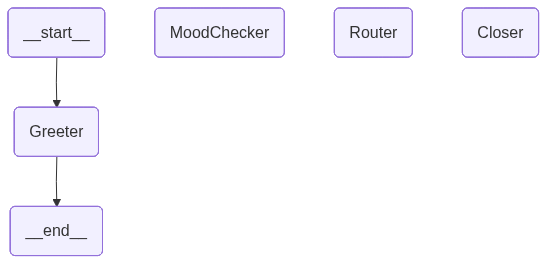

In [51]:
from IPython.display import Image, display

png_bytes = (
    app.get_graph().draw_mermaid_png()
)  # call the method (important: include ())
display(Image(png_bytes))

In [52]:
with open("expanded_langgraph_flow.png", "wb") as f:
    f.write(png_bytes)

#### Run the graph (robust call)

In [53]:
result = app.invoke({"message":"all","mood":"bad", "done":"ok","reply":"no"})

In [54]:
result

{'message': 'Hello, all how are you today?',
 'mood': 'bad',
 'reply': 'no',
 'done': 'ok'}

In [55]:
initial_state: AgentState = {"message": "I'm doing great today!"}

In [ ]:
# compiled app may be callable or provide run/execute methods; try all common options:
if callable(app):
    final_state = app(initial_state)
elif hasattr(app, "run"):
    final_state = app.run(initial_state)
elif hasattr(app, "execute"):
    final_state = app.execute(initial_state)
else:
    raise RuntimeError("Compiled graph isn't callable and has no run/execute method")

print("FINAL STATE:", final_state)

RuntimeError: Compiled graph isn't callable and has no run/execute method

In [56]:
initial_state: AgentState = {"message": "I'm doing great today!"}

final_state = app.invoke(initial_state)

print("FINAL STATE:", final_state["message"])

FINAL STATE: Hello, I'm doing great today! how are you today?


### Notes & tips
* I used a Router node to implement branching inside Python (this avoids depending on a specific add_edge(..., condition=...) API that may differ across langgraph versions).

* AgentState uses total=False so nodes can add fields (mood, reply, done) without type errors.

* To integrate a real LLM, make an LLM-node factory that takes a callable (e.g., a function wrapping OpenAI/HF inference) and returns a node that writes LLM output into state['reply']. 